# Presentation of Results

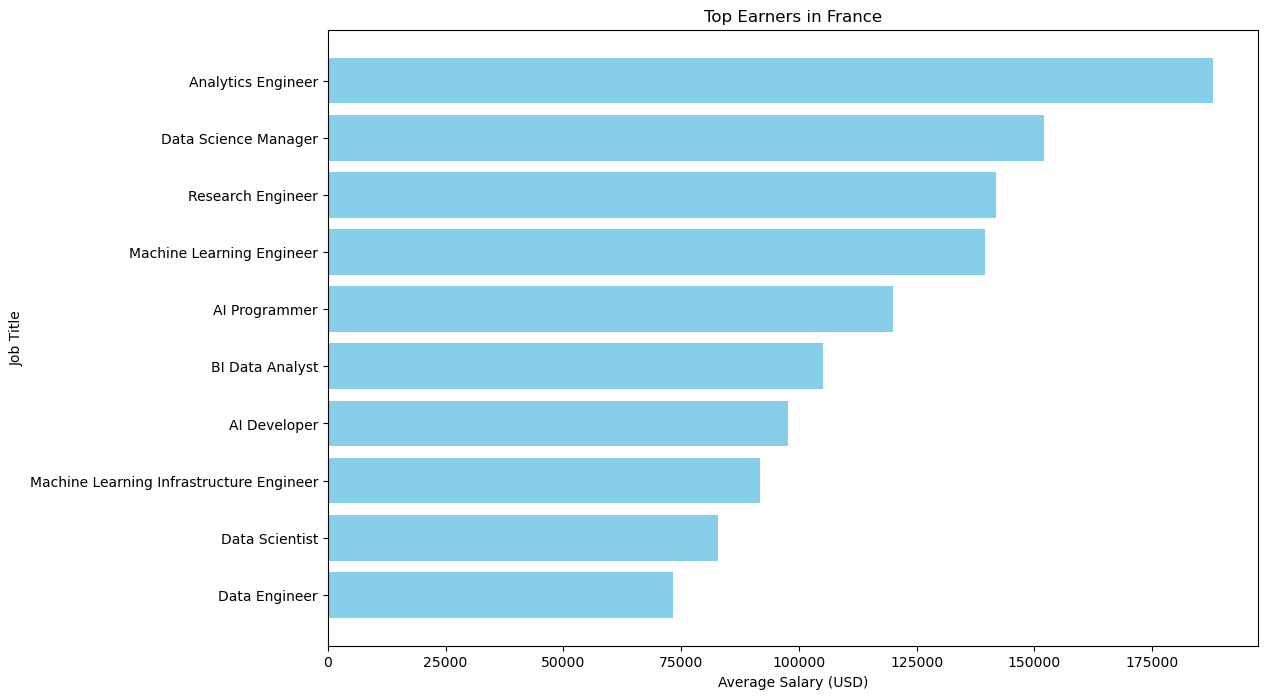

Number of people with different residence and company locations: 130
Number of individuals in the top 10 earners not residing in France but working for a French company: 3
Salaries of top earners in France who are not residents of France:
                  job_title  salary_in_usd
9822          AI Programmer         120000
15771        Data Scientist         110000
16499  Data Science Manager         152000


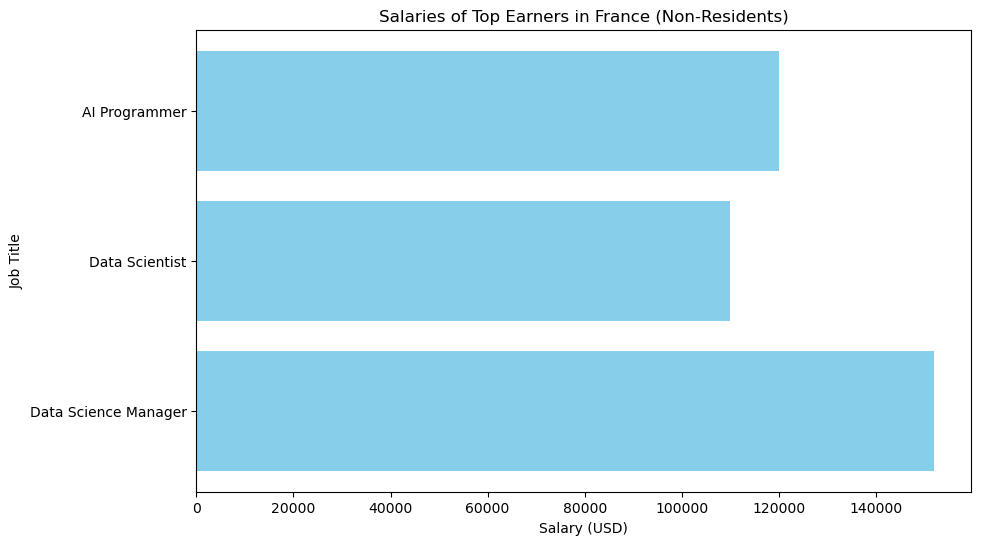

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
cleaned_data = pd.read_csv("../data/cleaned_salaries_data.csv")


# Assuming cleaned_data is already loaded and contains relevant columns
# Adjust column names based on your actual dataset

# Filter data for company locations in France ('FR')
france_data = cleaned_data[cleaned_data['company_location'] == 'FR']

# Group by job title and calculate average salary
average_salaries = france_data.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Sort by average salary in descending order
average_salaries_sorted = average_salaries.sort_values(by='salary_in_usd', ascending=False)

# Get the top 10 highest paying jobs
top_10_jobs = average_salaries_sorted.head(10)

#print("Top 10 Highest Paying Jobs in France ('FR'):")
#print(top_10_jobs)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_10_jobs['job_title'], top_10_jobs['salary_in_usd'], color='skyblue')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top Earners in France')
plt.gca().invert_yaxis()  # Invert y-axis to display highest salary at the top
plt.show()

# Count the number of people with different residence and company locations
different_locations_count = cleaned_data[cleaned_data['employee_residence'] != cleaned_data['company_location']].shape[0]

print("Number of people with different residence and company locations:", different_locations_count)




# Filter for individuals in the top 10 earners
top_10_earners = france_data[france_data['job_title'].isin(top_10_jobs['job_title'])]

# Count individuals not residing in France
non_residents_count = top_10_earners[top_10_earners['employee_residence'] != 'FR'].shape[0]

print("Number of individuals in the top 10 earners not residing in France but working for a French company:", non_residents_count)

non_residents_salaries = top_10_earners[top_10_earners['employee_residence'] != 'FR']['salary_in_usd']


# Filter for individuals not residing in France
non_residents = top_10_earners[top_10_earners['employee_residence'] != 'FR']

# Select only the columns of interest (job_title and salary_in_usd)
table_data = non_residents[['job_title', 'salary_in_usd']]

# Display the table
print("Salaries of top earners in France who are not residents of France:")
print(table_data)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(table_data['job_title'], table_data['salary_in_usd'], color='skyblue')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.title('Salaries of Top Earners in France (Non-Residents)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest salary at the top
plt.show()